In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 绘图中设置中文字体
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="C:/Windows/Fonts/simsun.ttc")

In [35]:
file_path = "./vgsales.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.shape)

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

## 分析目标

这是一份游戏销售数据，共11个字段，接近1.67万行 主要有游戏名称、发布平台、发布年份、类型、发布者和各地销售量。
通过这分数据，我将分析如下问题：
+ 最受欢迎的前十款游戏
+ 哪些类型游戏最受欢迎
+ ......

## 数据清洗

#### 显示缺失值

In [36]:
pd.DataFrame(df.isnull().sum(), columns=["缺失值数量"])

,缺失值数量
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#### 缺失数据量较少，直接删除缺失数据

In [37]:
df.dropna(how="any", inplace=True)
print(df.shape)
pd.DataFrame(df.isnull().sum(), columns=["缺失值数量"])

(16291, 11)


,缺失值数量
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## 数据分析

#### 全球销售量最高的十款游戏

In [38]:
max_sold = df[["Name","Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(10)
print(max_sold)

                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


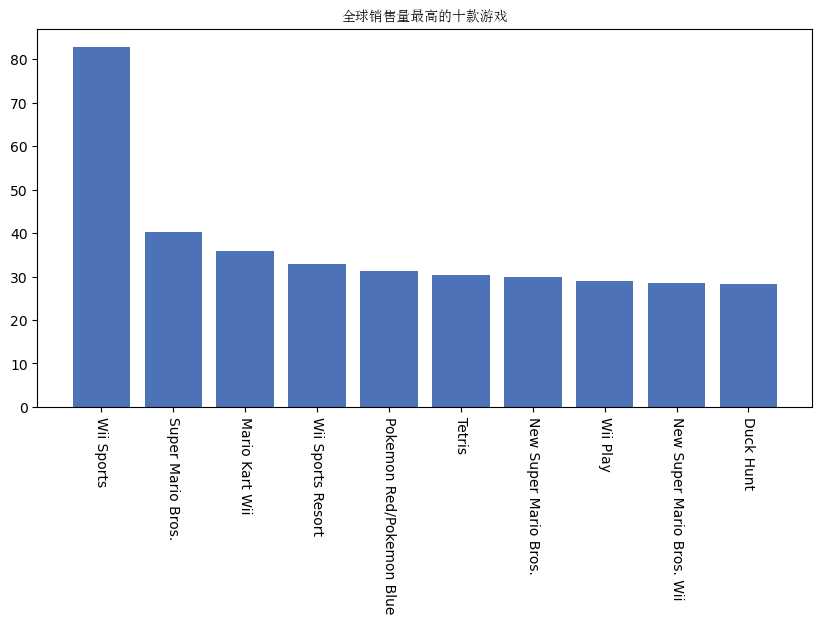

In [39]:
# 画图

plt.figure(figsize=(10,5), dpi=100)
plt.title("全球销售量最高的十款游戏", fontproperties=my_font)

_x = max_sold["Name"]
_y = max_sold["Global_Sales"]

plt.bar(range(len(_x)), _y, color="#4e72b8")
plt.xticks(range(len(_x)), list(_x), rotation=270)

plt.show()

#### 不同年份游戏的销售量

In [40]:
year_sale = df.groupby(by="Year")["Global_Sales"].sum()
print(year_sale.head())
# aaa = df.groupby(by="Year")[["Global_Sales","Name"]]
# for i in aaa:
#     if i[0] == 2008.0:
#         print(i)

Year
1980.0    11.38
1981.0    35.77
1982.0    28.86
1983.0    16.79
1984.0    50.36
Name: Global_Sales, dtype: float64


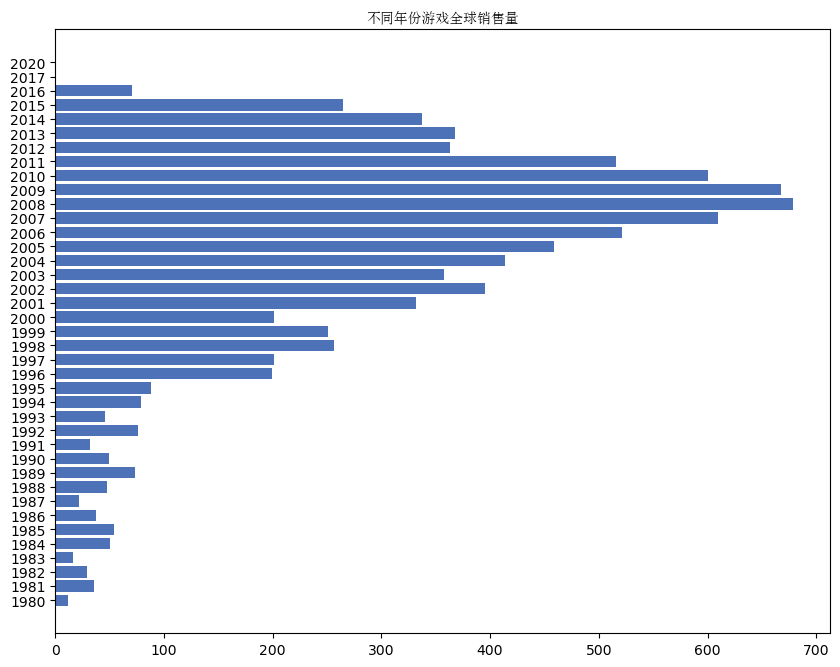

In [41]:
# 画图

plt.figure(figsize=(10,8), dpi=100)
plt.title("不同年份游戏全球销售量", fontproperties=my_font)

_x = year_sale.index
_x = [int(i) for i in _x]
_y = year_sale.values


plt.barh(range(len(_x)), _y, color="#4e72b8")
        
plt.yticks(range(len(_x)), list(_x))

plt.show()

#### 不同游戏平台所占游戏的全球销售量前20

In [42]:
plat_sale = df.groupby(by="Platform")["Global_Sales"].sum()
plat_sale = plat_sale.sort_values().tail(20)
print(plat_sale)

Platform
WiiU      81.86
2600      86.57
XOne     141.06
GC       197.14
SNES     200.05
N64      218.21
3DS      246.27
NES      251.07
XB       252.09
GB       254.42
PC       254.70
PS4      278.10
PSP      291.71
GBA      305.62
PS       727.39
DS       818.91
Wii      909.81
PS3      949.35
X360     969.60
PS2     1233.46
Name: Global_Sales, dtype: float64


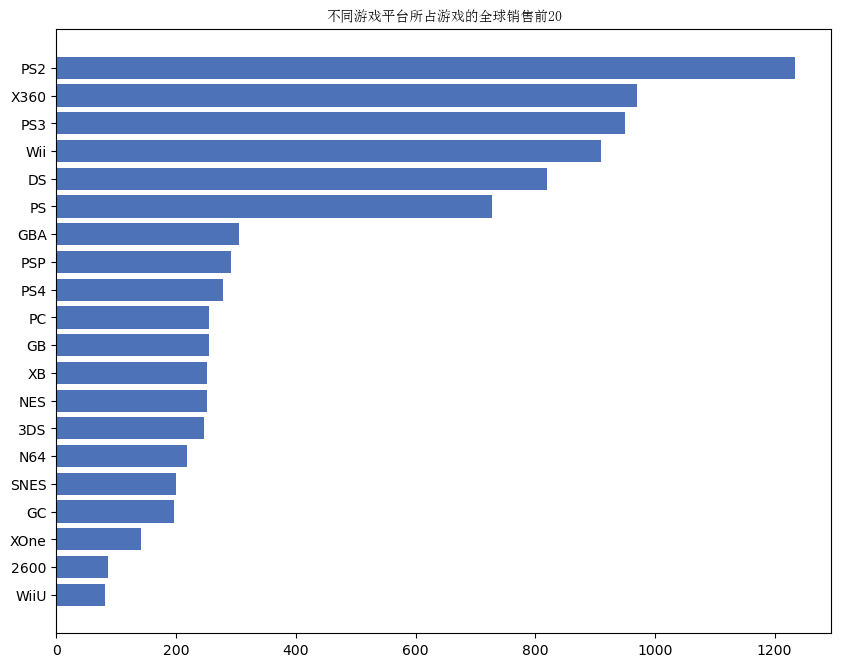

In [43]:
# 画图

plt.figure(figsize=(10,8), dpi=100)
plt.title("不同游戏平台所占游戏的全球销售前20", fontproperties=my_font)

_x = plat_sale.index
_y = plat_sale.values


plt.barh(range(len(_x)), _y, color="#4e72b8")
        
plt.yticks(range(len(_x)), list(_x))

plt.show()

#### 销售量最高的游戏发行公司

In [44]:
pub_sale = df.groupby(by="Publisher")["Global_Sales"].sum()
pub_sale = pub_sale.sort_values(ascending=False).head(10)
print(pub_sale)

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64


#### 发行游戏最多的游戏公司

In [45]:
pub_count_game = df.groupby(by="Publisher")["Name"].count()
pub_count_game = pub_count_game.sort_values(ascending=False).head(10)
print(pub_count_game)

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Name, dtype: int64


#### 不同地区游戏销售量

In [46]:
df[["NA_Sales", "EU_Sales","JP_Sales", "Other_Sales"]].sum()
# print(area_sale)

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

#### 不同类型游戏全球销售量

In [47]:
genre_sale = df.groupby(by="Genre")["Global_Sales"].sum()
genre_sale = genre_sale.sort_values(ascending=False)
print(genre_sale)

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64


#### 不同地区最受欢迎的游戏

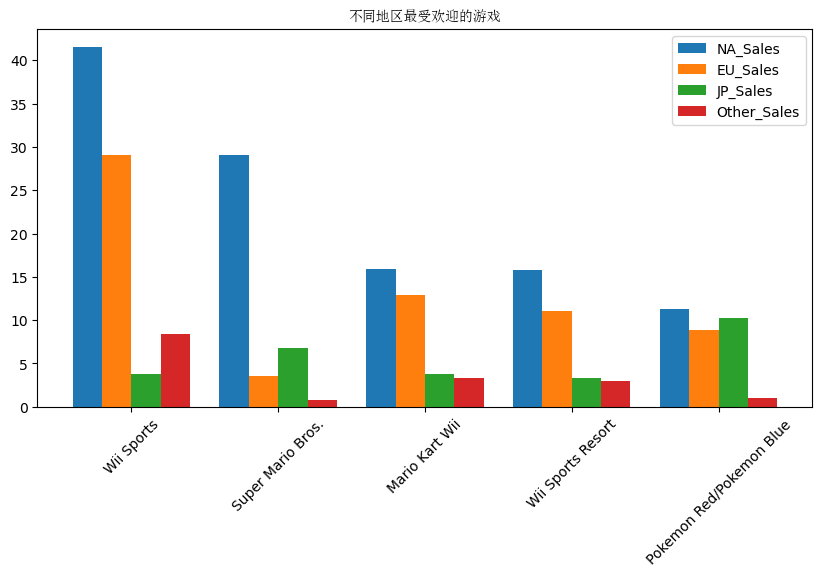

In [48]:
# for i in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]:
#     game = df[["Name",i]].head()
#     print(game["NA_Sales"])
#     #print(df[["Name",i]].head())#.sort_values(by=i, ascending=False))
#     print("*"*40)

# 画图
plt.figure(figsize=(10,5), dpi=100)
plt.title("不同地区最受欢迎的游戏", fontproperties=my_font)

width = 0
for i in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]:
    game = df[["Name",i]].head()
    
    _x = game["Name"]
    _y = game[i]

    plt.bar([i+width for i in list(range(len(_x)))], _y, width=0.2, label=i)
    width += 0.2
    
plt.xticks([i+0.3 for i in list(range(len(_x)))], list(_x), rotation=45)

plt.legend(loc="best")
plt.show()

## 不同类型游戏变化曲线

Year    Genre       
1980.0  Action           0.34
        Fighting         0.77
        Misc             2.71
        Shooter          7.07
        Sports           0.49
                        ...  
2016.0  Sports          14.60
        Strategy         0.50
2017.0  Action           0.01
        Role-Playing     0.04
2020.0  Simulation       0.29
Name: Global_Sales, Length: 389, dtype: float64
['Sports', 'Misc', 'Simulation', 'Strategy', 'Fighting', 'Racing', 'Role-Playing', 'Shooter', 'Action', 'Adventure', 'Puzzle', 'Platform']


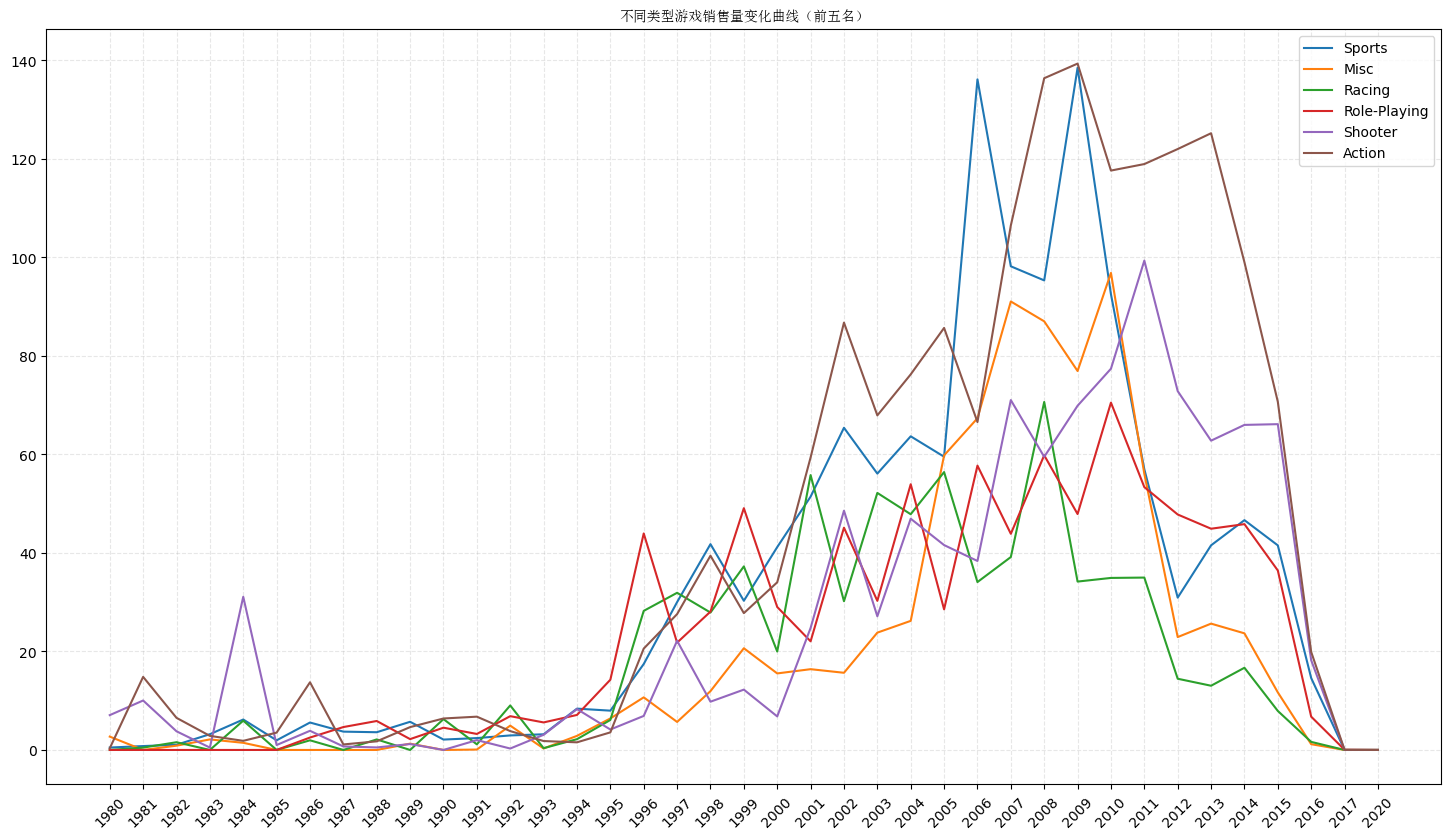

In [49]:
year_gener_sale = df.groupby(by=["Year","Genre"])["Global_Sales"].sum()
print(year_gener_sale)
# 获取游戏类型列表
genre_list = []
for i in year_gener_sale.index:
    genre_list.append(i[1])
genre_list = list(set(genre_list))
print(genre_list)


# 画图
plt.figure(figsize=(18,10), dpi=100)
plt.title("不同类型游戏销售量变化曲线（前五名）", fontproperties=my_font)


for g in genre_list: 
    _x = list(set(df["Year"].values))
    _y = []
    for i in set(df["Year"].values):
        try:
            a = year_gener_sale.loc[i].loc[g]
            _y.append(round(a,2))
        except BaseException:
            _y.append(0)
    # 去除销售量较少的类型
    if max(_y) > 50:
        plt.plot(range(len(_x)), _y, label=g)


plt.xticks(range(len(_x)), (int(i) for i in _x), rotation=45)

plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="best")
plt.show()

## 总结
+ 全球销售量最高的游戏是Wii Sports，销售量达到82.74万册，比第二名的Super Mario Bros 整整高出一倍


+ 通过对不同年份发行游戏的销售量进行汇总，数据从1980年开始，基本呈上升趋势，到08发行的游戏目前销售总量最高，这与当年发行的几款优秀作品不无关系：ario Kart Wii，Super Smash Bros. Brawl， Grand Theft Auto IV和Pokémon Platinum Version。08年之后降低的趋势可能和手游等的普及有关，也是因为销售时长较短，整体销量还未达到峰值。


| 游戏平台 | 总销售量（百万） |
|-----------|-------------|
|DS |818.91|
|Wii|909.81|
|PS3|949.35|
|X360|969.60|
|PS2|1233.46|

+ 从总的游戏销售量来看，在PS2发行的游戏销量最高，说PS2是目前最成功的游戏平台也不为过，这也使得索尼被称为电子游戏业三巨头之一。


|游戏公司|	总销售量（百万）|
|-----------|-------------|
|Nintendo|	1784.43|
|Electronic| Arts	1093.39|
|Activision|	721.41
|Sony Computer Entertainment|	607.28|
|Ubisoft|	473.54|

+ 再看游戏公司，任天堂1784.43（百万册）的销量，使第二名的EA公司难以望其项背。电子游戏业三巨头之一的称号也当之无愧。

|游戏公司|	发行数量|
|-----------|-------------|
|Electronic Arts|	1339|
|Activision| 	966|
|Namco Bandai Games|	928|
|Ubisoft	|918|
|Konami Digital Entertainment|	823|
|THQ|	712|
|Nintendo|	696|
|Sony Computer Entertainment|	682|
|Sega	|632|
|Take-Two Interactive| 	412|

+ 作为游戏销售总量的第二的EA公司，游戏发行游戏的数量以1399领先第二名将近400款，而任天堂只排到第7，看来任天堂发行游戏不在多，在于精


|销售地区|	总销售量（百万）|
|-----------|-------------|
|NA_Sales|	4327.65|
|EU_Sales|	2406.69|
|JP_Sales|	1284.27|
|Other_Sales|	788.91|

+ 游戏销售量最高的地区是北美，第二欧洲，而日本仅以一国之力，排入前三


+ 最受欢迎的游戏类型必须是Action类型，Sports类型位居第二
不同地区最受欢迎的游戏大致相同，但也有细微区别，比如北美地区第二受欢迎的游戏Super Mario Bros，在欧洲只能排到第五

+ 对不同类型的游戏，按照年份顺序来观察销售量变化趋势，整体趋势和所有游戏总销售量相同，但观察可以看出，Action和 Sports类型游戏增长趋势最强，Sports类型在2005-2006猛涨，可能大家越来越希望在游戏和健康生活中找到平衡。